*by Espoir Gaglo, Tanya dixit and Josmaily Lóriga*

In [ ]:
!pip install xclim
#View documentation here: https://xclim.readthedocs.io/en/stable/icclim.html

     |████████████████████████████████| 266kB 5.2MB/s 
     |████████████████████████████████| 4.7MB 6.7MB/s 
     |████████████████████████████████| 215kB 48.8MB/s 
     |████████████████████████████████| 174kB 51.6MB/s 
     |████████████████████████████████| 317kB 45.6MB/s 
     |████████████████████████████████| 737kB 53.4MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

cols =['temperature', 
              'relative_humidity', 
              'humidex', 
              'surface_solar_radiation', 
              'surface_thermal_radiation', 
              'surface_direct_solar_radiation', 
              'wind_speed', 
             'wind_direction', 
              'soil_temperature_level_1', 
              'soil_temperature_level_2', 
              'soil_temperature_level_3', 
              'soil_temperature_level_4', 
              'total_precipitation',
              'year',
            'month',
             'week',
              'day',
              'daysOfWeek',
              'hour',
              'gpslat',
               'gpslon' ] 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Official Folder of GPSDD Food Security Senegal Challenge/Data/task-1_climate-risk/LandSuitabilityData2014_2016/senegal_weather_2014_2016_inside_points_index_1100_to_1653.csv", names=cols)

In [ ]:

df_useful_data = df[["total_precipitation","temperature", "year","month", "day", "hour", "gpslat", "gpslon"]]
df_useful_data["time"]=pd.to_datetime(df_useful_data[["year", "month", "day", "hour"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_useful_data = df_useful_data.drop_duplicates(['gpslat', 'gpslon','time'])
df_useful_data.dropna(inplace=True)
df_temp = df_useful_data[["temperature", "year","month", "day", "hour", "gpslat", "gpslon", "time"]]
#df_useful_data = df_useful_data.drop(columns=['year','month','day','hour'])
df_useful_data

,total_precipitation,temperature,year,month,day,hour,gpslat,gpslon,time
0,0.0,21.81,2014,1,1,0,13.82,-13.23,2014-01-01 00:00:00
1,0.0,20.29,2014,1,1,1,13.82,-13.23,2014-01-01 01:00:00
2,0.0,19.62,2014,1,1,2,13.82,-13.23,2014-01-01 02:00:00
3,0.0,19.77,2014,1,1,3,13.82,-13.23,2014-01-01 03:00:00
4,0.0,18.42,2014,1,1,4,13.82,-13.23,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
26276,0.0,25.01,2016,12,30,20,12.32,-12.33,2016-12-30 20:00:00
26277,0.0,23.99,2016,12,30,21,12.32,-12.33,2016-12-30 21:00:00
26278,0.0,23.59,2016,12,30,22,12.32,-12.33,2016-12-30 22:00:00
26279,0.0,23.31,2016,12,30,23,12.32,-12.33,2016-12-30 23:00:00


In [ ]:
#find begin of the season..
#We can set by default 15/07 or the begin of rain when rain in 5 day >= 15 mm 

"""Parameters: beginning and end of growing season"""
###Source:
"""http://www.fao.org/3/a-t0732e.pdf"""
"""http://etccdi.pacificclimate.org/list_27_indices.shtml"""
"""https://www.int-res.com/articles/cr2003/23/c023p159.pdf"""
"""https://www.researchgate.net/publication/318256179_Characterization_of_Climate_Risks_for_Rice_Crop_in_Casamance_Senegal"""
"""https://www.cse.sn/index.php/publications/veille-environnementale/suivi-de-la-campagne-agricole/send/9-suivi-de-la-campagne-agricole/28-bilan-de-fin-de-campagne-2016"""
#in the model of FAO,the time when moisture supply is 0.5 ET is taken as the reference 
#beginning of the growing period. Hr = 0.5 ET
#The time when Pn = 0.5 ET in the post-humid period is taken as the reference
#end of rains and rainy season. Hr < 0.5 ET

'https://www.cse.sn/index.php/publications/veille-environnementale/suivi-de-la-campagne-agricole/send/9-suivi-de-la-campagne-agricole/28-bilan-de-fin-de-campagne-2016'

In [ ]:

# Set index
df_useful_data = df_useful_data.set_index(df_useful_data['time'])

# Select observations between two datetimes
df_2014 = df_useful_data.loc['2014-07-01':'2014-11-30']
#df_2015 = df_useful_data.loc['2015-07-01':'2015-11-30']
#df_2016 = df_useful_data.loc['2016-07-01':'2016-11-30']
#frames = [df_2014, df_2015, df_2016]
#df_useful_with_grow_period = pd.concat(frames).drop(columns=['time'])

#Just use 2014 dataset
df_useful_with_grow_period = df_2014.drop(columns=['time'])
df_useful_with_grow_period.reset_index(inplace=True)
#df_with_grow_period = df_with_grow_period.drop(columns=['time'])
print(df_useful_with_grow_period.shape)
df_useful_with_grow_period

(2030616, 9)


,time,total_precipitation,temperature,year,month,day,hour,gpslat,gpslon
0,2014-07-01 00:00:00,0.01,29.36,2014,7,1,0,13.82,-13.23
1,2014-07-01 01:00:00,0.00,29.56,2014,7,1,1,13.82,-13.23
2,2014-07-01 02:00:00,0.00,27.20,2014,7,1,2,13.82,-13.23
3,2014-07-01 03:00:00,0.00,27.25,2014,7,1,3,13.82,-13.23
4,2014-07-01 04:00:00,0.00,26.84,2014,7,1,4,13.82,-13.23
...,...,...,...,...,...,...,...,...,...
2030611,2014-11-30 19:00:00,0.00,28.62,2014,11,30,19,12.32,-12.33
2030612,2014-11-30 20:00:00,0.00,26.09,2014,11,30,20,12.32,-12.33
2030613,2014-11-30 21:00:00,0.00,24.31,2014,11,30,21,12.32,-12.33
2030614,2014-11-30 22:00:00,0.00,24.55,2014,11,30,22,12.32,-12.33


In [ ]:
df_with_grow_period = df_useful_with_grow_period.drop(columns=['year','month','day','hour'])
df_with_grow_period= df_with_grow_period.drop_duplicates(['gpslat', 'gpslon','time'])
df_with_grow_period = df_with_grow_period.dropna()
df_with_grow_period

,time,total_precipitation,temperature,gpslat,gpslon
0,2014-07-01 00:00:00,0.01,29.36,13.82,-13.23
1,2014-07-01 01:00:00,0.00,29.56,13.82,-13.23
2,2014-07-01 02:00:00,0.00,27.20,13.82,-13.23
3,2014-07-01 03:00:00,0.00,27.25,13.82,-13.23
4,2014-07-01 04:00:00,0.00,26.84,13.82,-13.23
...,...,...,...,...,...
2030611,2014-11-30 19:00:00,0.00,28.62,12.32,-12.33
2030612,2014-11-30 20:00:00,0.00,26.09,12.32,-12.33
2030613,2014-11-30 21:00:00,0.00,24.31,12.32,-12.33
2030614,2014-11-30 22:00:00,0.00,24.55,12.32,-12.33


 1.   **Length of the growing period (LGP)** 

The number of days within the period of temperatures above 5°C when moisture conditions are considered adequate to crop growth.   
*DGS = Day of the growing season

In [ ]:
import xarray as xr
xarray_df = df_with_grow_period.set_index(['gpslat', 'gpslon','time']).to_xarray()
xx = xarray_df.resample(time='D').mean(dim='time') # xclim module take daily data
temp = xx['temperature']
temp.attrs['units'] = "C"
temp.attrs['long_name']= 'daily temperature'

/usr/local/lib/python3.6/dist-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [ ]:
#temp_2014 = temp.sel(time=slice("2014-07-01", "2014-12-31"))
#from xclim.indices import growing_season_length
#gsl_2014= growing_season_length(temp, mid_date="07-01", thresh='25.0 degC', freq="AS")

In [ ]:
#result = gsl_2014.to_dataframe().reset_index()
#result = result[result['temperature'] != 0]
#result.rename(columns={"temperature" : "GSL"}, inplace=True)
#result.head()

For the indice above, according to http://etccdi.pacificclimate.org/list_27_indices.shtml, we get the right result (T° per day > 5C for hole year) but if we take account realistic situation growing season extand between 15 June / 30 November....
 Try to use another approach

*    Try to use another approach if possible 







2. **Total rainfall in the GS by each gps point**  

Sum of rainfall from DGS1 to DGSn (Day of the growing season)

In [ ]:
precip = xx['total_precipitation']
precip.attrs['units'] = "mm/day"
precip.attrs['long_name']= 'Mean daily precipitation'
precip

<xarray.DataArray 'total_precipitation' (time: 153, gpslat: 16, gpslon: 54)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.30791667, 0.31375   , 0.32125   , ...,        nan,
                nan,        nan],
        [0.21375   , 0.22208333, 0.22958333, ..., 0.02083333,
         0.02958333, 0.02625   ],
        ...,
        [       nan,        nan, 0.0375    , ...,        nan,
                nan,        nan],
        [       nan, 0.02791667, 0.03458333, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.00833333, 0.00833333, 0.00625   , ...,        nan,
                nan,        nan],
        [0.00791667, 0.00583333, 0.00416667, ..., 0.10958333,
         0.11458333, 0.12291667],
        ...,
        [       nan,        nan, 0.00333333, ...,        nan,
                nan,        nan],
        [       nan, 0.00333333, 0.00291667, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.00333333, 0.00833333, 0.01333333, ...,        nan,
                nan,        nan],
        [0.00458333, 0.01083333, 0.01666667, ..., 0.36083333,
         0.33875   , 0.35125   ],
        ...,
        [       nan,        nan, 0.00291667, ...,        nan,
                nan,        nan],
        [       nan, 0.00166667, 0.00166667, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       ...,

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan, 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan, 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan, 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-07-01 2014-07-02 ... 2014-11-30
  * gpslon   (gpslon) float64 -16.73 -16.63 -16.53 ... -11.63 -11.53 -11.43
  * gpslat   (gpslat) float64 12.32 12.42 12.52 12.62 ... 13.62 13.72 13.82
Attributes:
    units:      mm/day
    long_name:  Mean daily precipitation

*   **for each gps point**




In [ ]:
from xclim.indices import precip_accumulation

prcp_tot_seasonal = precip_accumulation(precip, freq='Y')
#prcp_tot_seasonal
prcp_tot_seasonal_for_each_point = prcp_tot_seasonal.to_dataframe().reset_index()
prcp_tot_seasonal_for_each_point.rename(columns={"total_precipitation" : "Sum rainfall Jun_to_Nov_(mm)"}, inplace=True)

/usr/local/lib/python3.6/dist-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


In [ ]:
prcp_tot_seasonal_for_each_point

,time,gpslat,gpslon,Sum rainfall Jun_to_Nov_(mm)
0,2014-12-31,12.32,-16.730000,0.0
1,2014-12-31,12.32,-16.629999,0.0
2,2014-12-31,12.32,-16.530001,0.0
3,2014-12-31,12.32,-16.430000,0.0
4,2014-12-31,12.32,-16.330000,0.0
...,...,...,...,...
859,2014-12-31,13.82,-11.830000,0.0
860,2014-12-31,13.82,-11.730000,0.0
861,2014-12-31,13.82,-11.630000,0.0
862,2014-12-31,13.82,-11.530000,0.0


3. **Sum of rainfall in the showing month**  
Sum of rainfall received in the
sowing month (in June)

In [ ]:
# Select observations between two datetimes
df_sowing_month_2014 = df_useful_data.loc['2014-07-01':'2014-07-30']
df_sowing_month_2015 = df_useful_data.loc['2015-07-01':'2015-07-30']
df_sowing_month_2016 = df_useful_data.loc['2016-07-01':'2016-07-30']

#frames_sowing_month = [df_sowing_month_2014, df_sowing_month_2015, df_sowing_month_2016]
#df_with_sowing_period = pd.concat(frames_sowing_month).drop(columns=['time'])
df_with_sowing_period = df_sowing_month_2014.drop(columns=['time'])
df_with_sowing_period.reset_index(inplace=True)

print(df_with_sowing_period.shape)
df_with_sowing_period.tail()

(398160, 9)


,time,total_precipitation,temperature,year,month,day,hour,gpslat,gpslon
398155,2014-07-30 19:00:00,0.00,26.05,2014,7,30,19,12.32,-12.33
398156,2014-07-30 20:00:00,0.01,25.36,2014,7,30,20,12.32,-12.33
398157,2014-07-30 21:00:00,0.01,25.07,2014,7,30,21,12.32,-12.33
398158,2014-07-30 22:00:00,0.04,25.29,2014,7,30,22,12.32,-12.33
398159,2014-07-30 23:00:00,0.01,25.28,2014,7,30,23,12.32,-12.33


In [ ]:
df_with_sowing_period

,time,total_precipitation,temperature,year,month,day,hour,gpslat,gpslon
0,2014-07-01 00:00:00,0.01,29.36,2014,7,1,0,13.82,-13.23
1,2014-07-01 01:00:00,0.00,29.56,2014,7,1,1,13.82,-13.23
2,2014-07-01 02:00:00,0.00,27.20,2014,7,1,2,13.82,-13.23
3,2014-07-01 03:00:00,0.00,27.25,2014,7,1,3,13.82,-13.23
4,2014-07-01 04:00:00,0.00,26.84,2014,7,1,4,13.82,-13.23
...,...,...,...,...,...,...,...,...,...
398155,2014-07-30 19:00:00,0.00,26.05,2014,7,30,19,12.32,-12.33
398156,2014-07-30 20:00:00,0.01,25.36,2014,7,30,20,12.32,-12.33
398157,2014-07-30 21:00:00,0.01,25.07,2014,7,30,21,12.32,-12.33
398158,2014-07-30 22:00:00,0.04,25.29,2014,7,30,22,12.32,-12.33


*   **for each gps point**

In [ ]:
df_with_sowing_period.drop_duplicates(['gpslat', 'gpslon','time'], inplace=True)
xr_sowing = df_with_sowing_period.set_index(['gpslat', 'gpslon','time']).to_xarray()
xx_sowing = xr_sowing.resample(time='D').mean(dim='time') # xclim module take daily data
precip_sowing = xx_sowing['total_precipitation']
precip_sowing.attrs['units'] = "mm/day"
precip_sowing.attrs['long_name']= 'Mean daily precipitation'

from xclim.indices import precip_accumulation

prcp_tot_sowing = precip_accumulation(precip_sowing, freq='Y')
#prcp_tot_seasonal
prcp_tot_sowing_for_each_point = prcp_tot_sowing.to_dataframe().reset_index()
prcp_tot_sowing_for_each_point.rename(columns={"total_precipitation" : "Sum rainfall in Jun(mm)"}, inplace=True)


prcp_tot_sowing_for_each_point.head()

/usr/local/lib/python3.6/dist-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


,time,gpslat,gpslon,Sum rainfall in Jun(mm)
0,2014-12-31,12.32,-16.730000,0.0
1,2014-12-31,12.32,-16.629999,0.0
2,2014-12-31,12.32,-16.530001,0.0
3,2014-12-31,12.32,-16.430000,0.0
4,2014-12-31,12.32,-16.330000,0.0


In [ ]:
prcp_tot_sowing_for_each_point

,time,gpslat,gpslon,Sum rainfall in Jun(mm)
0,2014-12-31,12.32,-16.730000,0.0
1,2014-12-31,12.32,-16.629999,0.0
2,2014-12-31,12.32,-16.530001,0.0
3,2014-12-31,12.32,-16.430000,0.0
4,2014-12-31,12.32,-16.330000,0.0
...,...,...,...,...
859,2014-12-31,13.82,-11.830000,0.0
860,2014-12-31,13.82,-11.730000,0.0
861,2014-12-31,13.82,-11.630000,0.0
862,2014-12-31,13.82,-11.530000,0.0


4. **Rainfall coefficient of variation across Senegal**  
The ratio of the standard deviation of the monthly sum of rainfall from DGS1 to DGSn of the whole country to the mean monthly rainfall

In [ ]:
#from xclim.indices import precip_seasonality
#precip_seasonality(precip)
#Some issues with this indice in xclim
#https://github.com/Ouranosinc/xclim/commit/0946d430ada401dfd653c6af4785d7a64f9a43ab


In [ ]:
x = df_useful_with_grow_period.rename(columns={"total_precipitation" : "rain"})

In [ ]:
#std_rain = 
dataset = x.groupby(['year', 'gpslat', 'gpslon']).agg(
    {'temperature':['mean'],
     'rain':['std','mean']})
dataset.columns = ["_".join(x) for x in dataset.columns.ravel()]

#average_rain = 
#dataset = dataset.reset_index()
#dataset.groupby(['year', 'gpslat', 'gpslon']).agg(   
    #{'temperature':['mean'],
     #'rain_sum':['std']})

In [ ]:
dataset["rain_cv"] = (dataset["rain_std"]/dataset["rain_mean"])
coef_rain = dataset.reset_index()
coef_rain.head()

,year,gpslat,gpslon,temperature_mean,rain_std,rain_mean,rain_cv
0,2014,12.32,-12.330000,26.323162,0.570540,0.179673,3.175430
1,2014,12.42,-16.730000,27.266465,0.735287,0.231345,3.178310
2,2014,12.42,-16.629999,27.353772,0.712052,0.240308,2.963085
3,2014,12.42,-16.530001,27.441261,0.714582,0.249371,2.865538
4,2014,12.42,-16.430000,27.473235,0.694153,0.252612,2.747908


In [ ]:
coef_rain.drop(["temperature_mean",	"rain_std",	"rain_mean"], axis=1, inplace=True)

In [ ]:
coef_rain.rename(columns={"rain_cv" : "rain_coef_of_var"}, inplace=True)
coef_rain

,year,gpslat,gpslon,rain_coef_of_var
0,2014,12.32,-12.330000,3.175430
1,2014,12.42,-16.730000,3.178310
2,2014,12.42,-16.629999,2.963085
3,2014,12.42,-16.530001,2.865538
4,2014,12.42,-16.430000,2.747908
...,...,...,...,...
548,2014,13.82,-12.430000,4.920405
549,2014,13.82,-12.330000,4.962600
550,2014,13.82,-12.230000,5.075394
551,2014,13.82,-12.130000,4.939888


5. **Diurnal temperature range between DGS1 and DGSn across Senegal**  
Mean difference
between the daily
maximum temperature
and the daily minimum
temperature from DGS1
to DGSn

In [ ]:
df_temp = df_temp.set_index(df_temp['time'])

df_temp_2014 = df_temp.loc['2014-01-01 00:00:00':'2014-11-30 23:00:00']
df_temp_2014.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_temp_2014.set_index(["time"], inplace=True)
df_temp_2014.tail()

,temperature,gpslat,gpslon
time,,,
2014-11-30 19:00:00,28.62,12.32,-12.33
2014-11-30 20:00:00,26.09,12.32,-12.33
2014-11-30 21:00:00,24.31,12.32,-12.33
2014-11-30 22:00:00,24.55,12.32,-12.33
2014-11-30 23:00:00,24.42,12.32,-12.33


In [ ]:
#extract min and max temperature for every day
import numpy as np
df_temp_2014.reset_index(inplace=True)
temperature_summary = df_temp_2014.groupby(np.arange(len(df_temp_2014))//24).agg(['min', 'max']) #24 for one day


In [ ]:
temperature_summary
temperature_summary.columns = temperature_summary.columns.map('_'.join).str.strip('_')
temperature_summary.rename(columns={"time_min" : "time", "gpslat_min" : "gpslat", 
                                    "gpslon_min" : "gpslon"}, inplace=True)
temperature_summary.drop(columns=["time_max", "gpslat_max", "gpslon_max"], inplace=True)
df_array_temp = temperature_summary.set_index(['gpslat', 'gpslon','time']).to_xarray()

In [ ]:
df_array_temp

<xarray.Dataset>
Dimensions:          (gpslat: 16, gpslon: 54, time: 334)
Coordinates:
  * gpslat           (gpslat) float64 12.32 12.42 12.52 ... 13.62 13.72 13.82
  * gpslon           (gpslon) float64 -16.73 -16.63 -16.53 ... -11.53 -11.43
  * time             (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-11-30
Data variables:
    temperature_min  (gpslat, gpslon, time) float64 nan nan nan ... nan nan nan
    temperature_max  (gpslat, gpslon, time) float64 nan nan nan ... nan nan nan

In [ ]:
#got tasmin and tasmax value in array format
tasmin = df_array_temp["temperature_min"]
tasmax = df_array_temp["temperature_max"]
#set attributes
tasmin.attrs['units'] = "C"
tasmin.attrs['long_name']= 'min daily temperature'
tasmax.attrs['units'] = "C"
tasmax.attrs['long_name']= 'max daily temperature'
tasmin

<xarray.DataArray 'temperature_min' (gpslat: 16, gpslon: 54, time: 334)>
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[20.13, 21.74, 22.43, ..., 24.13, 23.21, 23.09],
        [19.21, 21.  , 22.02, ..., 23.46, 22.7 , 22.52],
        [18.28, 20.19, 21.5 , ..., 22.78, 22.2 , 21.96],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[19.51, 21.21, 22.12, ..., 23.71, 22.88, 22.69],
        [18.47, 20.3 , 21.56, ..., 22.95, 22.33, 22.07],
        [17.41, 19.39, 20.97, ..., 22.19, 21.79, 21.45],
        ...,
        [18.65, 16.88, 18.43, ..., 19.55, 20.93, 20.4 ],
        [18.54, 17.13, 18.62, ..., 19.57, 21.01, 20.59],
        [18.58, 17.15, 18.57, ..., 19.99, 20.95, 20.7 ]],

       ...,

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [17.75, 19.88, 20.5 , ..., 21.89, 20.86, 20.82],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [18.25, 20.21, 20.58, ..., 22.11, 21.12, 21.19],
        [17.42, 19.77, 20.27, ..., 21.67, 20.56, 20.56],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]])
Coordinates:
  * gpslat   (gpslat) float64 12.32 12.42 12.52 12.62 ... 13.62 13.72 13.82
  * gpslon   (gpslon) float64 -16.73 -16.63 -16.53 ... -11.63 -11.53 -11.43
  * time     (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-11-30
Attributes:
    units:      C
    long_name:  min daily temperature

In [ ]:
from xclim.indices import daily_temperature_range
diurnal_temp_array = daily_temperature_range(tasmin, tasmax)
diurnal_temp = daily_temperature_range(tasmin, tasmax).to_dataframe(name='Diurnal temperature in the GP (° C)').reset_index()
diurnal_temp.head()

/usr/local/lib/python3.6/dist-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


,gpslat,gpslon,time,Diurnal temperature
0,12.32,-16.730000,2014-01-01,NaN
1,12.32,-16.629999,2014-01-01,NaN
2,12.32,-16.530001,2014-01-01,NaN
3,12.32,-16.430000,2014-01-01,NaN
4,12.32,-16.330000,2014-01-01,NaN


6. **Mean temperature growing season**  
The average temperature from DGS1 to DGSn

In [ ]:
average_temp_growing = x.groupby(['year', 'gpslat', 'gpslon']).agg({'temperature':['mean']})

average_temp_growing = average_temp_growing.reset_index()
average_temp_growing.rename(columns={"temperature" : " Mean temperature in the GP (° C)"}, inplace=True)
average_temp_growing.columns = average_temp_growing.columns.droplevel(1)
average_temp_growing.head()

,year,gpslat,gpslon,Mean temperature in the GP (° C)
0,2014,12.32,-12.330000,26.323162
1,2014,12.42,-16.730000,27.266465
2,2014,12.42,-16.629999,27.353772
3,2014,12.42,-16.530001,27.441261
4,2014,12.42,-16.430000,27.473235


7. **Extreme GP temperature range**  
The highest max temperature minus the lowest min temperature from DGS1 to DGSn

In [ ]:
from xclim.indices import extreme_temperature_range

extrem_temp = extreme_temperature_range(tasmin, tasmax)
extrem_temp
#transform in dataframe
temp_range = extrem_temp.to_dataframe(name="Extreme temperature in the GP (° C)").reset_index()
temp_range.head()

/usr/local/lib/python3.6/dist-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


,gpslat,gpslon,time,Extreme temperature in the GP (° C)
0,12.32,-16.730000,2014-01-01,NaN
1,12.32,-16.629999,2014-01-01,NaN
2,12.32,-16.530001,2014-01-01,NaN
3,12.32,-16.430000,2014-01-01,NaN
4,12.32,-16.330000,2014-01-01,NaN


**Merge output value and export to csv file**

In [ ]:
print(temp_range.shape)
print(average_temp_growing.shape)
print(diurnal_temp.shape)
print(coef_rain.shape)
print(prcp_tot_sowing_for_each_point.shape)
print(prcp_tot_seasonal_for_each_point.shape)

(864, 4)
(553, 4)
(864, 4)
(553, 4)
(864, 4)
(864, 4)


In [ ]:
result1 = pd.merge(temp_range, average_temp_growing, on=["gpslat", "gpslon"])

#result.to_csv("files_climatic_indeces.csv")

In [ ]:
 result2 = pd.merge(result1, diurnal_temp, on=["gpslat", "gpslon"])
#                  prcp_tot_sowing_for_each_point, prcp_tot_seasonal_for_each_point,

In [ ]:
result3 = pd.merge(result2, prcp_tot_sowing_for_each_point, on=["gpslat", "gpslon"])

In [ ]:
result4 = pd.merge(result3, prcp_tot_seasonal_for_each_point, on=["gpslat", "gpslon"])

In [ ]:
result5 = pd.merge(result4, coef_rain, on=["gpslat", "gpslon"])

In [ ]:
result5

,gpslat,gpslon,time_x,Extreme temperature in the GP (° C),year_x,Mean temperature in the GP (° C),time_y,Diurnal temperature,time_x,Sum rainfall in Jun(mm),time_y,Sum rainfall Jun_to_Nov_(mm),year_y,rain_coef_of_var
0,12.32,-12.330000,2014-01-01,24.89,2014,26.323162,2014-01-01,10.149491,2014-12-31,5.335417,2014-12-31,27.490000,2014,3.175430
1,12.42,-16.730000,2014-01-01,13.70,2014,27.266465,2014-01-01,3.892275,2014-12-31,6.653333,2014-12-31,35.395833,2014,3.178310
2,12.42,-16.629999,2014-01-01,15.25,2014,27.353772,2014-01-01,5.713802,2014-12-31,6.798333,2014-12-31,36.767083,2014,2.963085
3,12.42,-16.530001,2014-01-01,18.11,2014,27.441261,2014-01-01,7.580599,2014-12-31,6.948333,2014-12-31,38.153750,2014,2.865538
4,12.42,-16.430000,2014-01-01,19.73,2014,27.473235,2014-01-01,8.795329,2014-12-31,6.810417,2014-12-31,38.649583,2014,2.747908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,13.82,-12.430000,2014-01-01,27.81,2014,29.206119,2014-01-01,12.039012,2014-12-31,3.484583,2014-12-31,13.664583,2014,4.920405
549,13.82,-12.330000,2014-01-01,27.70,2014,29.180610,2014-01-01,11.971737,2014-12-31,3.683750,2014-12-31,13.668333,2014,4.962600
550,13.82,-12.230000,2014-01-01,27.60,2014,29.159450,2014-01-01,11.920030,2014-12-31,3.822500,2014-12-31,13.720000,2014,5.075394
551,13.82,-12.130000,2014-01-01,27.47,2014,29.156062,2014-01-01,11.883024,2014-12-31,3.713750,2014-12-31,13.933333,2014,4.939888


In [ ]:
final=result5.drop(["time_x", "time_y", "year_x", "year_y"], axis=1)

In [ ]:
final.drop_duplicates()

,gpslat,gpslon,Extreme temperature in the GP (° C),Mean temperature in the GP (° C),Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var
0,12.32,-12.330000,24.89,26.323162,10.149491,5.335417,27.490000,3.175430
1,12.42,-16.730000,13.70,27.266465,3.892275,6.653333,35.395833,3.178310
2,12.42,-16.629999,15.25,27.353772,5.713802,6.798333,36.767083,2.963085
3,12.42,-16.530001,18.11,27.441261,7.580599,6.948333,38.153750,2.865538
4,12.42,-16.430000,19.73,27.473235,8.795329,6.810417,38.649583,2.747908
...,...,...,...,...,...,...,...,...
548,13.82,-12.430000,27.81,29.206119,12.039012,3.484583,13.664583,4.920405
549,13.82,-12.330000,27.70,29.180610,11.971737,3.683750,13.668333,4.962600
550,13.82,-12.230000,27.60,29.159450,11.920030,3.822500,13.720000,5.075394
551,13.82,-12.130000,27.47,29.156062,11.883024,3.713750,13.933333,4.939888


In [ ]:
### output in csv format
final.to_csv("final2014_output_dataset5.csv")

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content")
omdena_drive ="/content/drive/MyDrive/Official Folder of GPSDD Food Security Senegal Challenge/Data/task-1_climate-risk/LandSuitabilityData2014_2016"
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( omdena_drive + "/final2014_output_dataset.csv", index=False)

**The section below is to create choropleth maps of the climatic variables calculated**


Libraries

In [ ]:
from pathlib import Path
from matplotlib import pyplot as plt
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
import geopandas as gpd
import shapely.geometry as shpgeom

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

Setting up access to "final2014_output_dataset.csv"

In [ ]:
url_Clim = 'https://drive.google.com/file/d/1vwH05Yn3JOMH0TaK3TGvE-F6-UlhBKZ-/view?usp=sharing'
Clim_path = 'https://drive.google.com/uc?export=download&id='+url_Clim.split('/')[-2]
#print(Clima_file_path)
Clim_file_name = "final2014_output_dataset.csv"
Clim_file_path = Path(url_Clim).joinpath(Clim_file_name)
print(Clim_file_path)

https:/drive.google.com/file/d/1vwH05Yn3JOMH0TaK3TGvE-F6-UlhBKZ-/view?usp=sharing/final2014_output_dataset.csv


Creating GeoPandasDataFrame

In [ ]:
import pandas as pd
Clim_df = pd.read_csv(Clim_path)
Clim_df

,Unnamed: 0,gpslat,gpslon,Extreme intra-period,Mean temperature,Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var
0,0,15.02,-17.030001,18.07,27.173420,5.347186,0.345417,5.464583,5.628123
1,1,15.02,-16.930000,21.56,27.416781,7.402964,0.420417,6.319167,5.580527
2,2,15.02,-16.830000,25.53,27.682603,9.520659,0.471250,7.124167,5.696689
3,3,15.02,-16.730000,28.92,27.929826,11.395868,0.512500,7.846667,5.874703
4,4,15.02,-16.629999,29.93,28.102682,12.245509,0.510833,8.244583,5.860745
...,...,...,...,...,...,...,...,...,...
3301,295,15.02,-12.930000,29.24,30.435523,12.105299,2.182500,8.517917,6.723689
3302,296,15.02,-12.830000,29.18,30.544453,12.075689,2.258750,8.229583,6.765548
3303,297,15.02,-12.730000,29.10,30.654472,12.051048,2.318750,7.916667,6.872024
3304,298,15.02,-12.630000,28.95,30.769216,12.001078,2.321250,7.531667,6.496414


In [ ]:
# create a geopandas dataframe and set the crs
Clim_gpd = gpd.GeoDataFrame(Clim_df, geometry=gpd.points_from_xy(Clim_df.gpslon, Clim_df.gpslat))
Clim_gpd.crs ='EPSG:4326'
Clim_gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
Clim_gpd

,Unnamed: 0,gpslat,gpslon,Extreme intra-period,Mean temperature,Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var,geometry
0,0,15.02,-17.030001,18.07,27.173420,5.347186,0.345417,5.464583,5.628123,POINT (-17.03000 15.02000)
1,1,15.02,-16.930000,21.56,27.416781,7.402964,0.420417,6.319167,5.580527,POINT (-16.93000 15.02000)
2,2,15.02,-16.830000,25.53,27.682603,9.520659,0.471250,7.124167,5.696689,POINT (-16.83000 15.02000)
3,3,15.02,-16.730000,28.92,27.929826,11.395868,0.512500,7.846667,5.874703,POINT (-16.73000 15.02000)
4,4,15.02,-16.629999,29.93,28.102682,12.245509,0.510833,8.244583,5.860745,POINT (-16.63000 15.02000)
...,...,...,...,...,...,...,...,...,...,...
3301,295,15.02,-12.930000,29.24,30.435523,12.105299,2.182500,8.517917,6.723689,POINT (-12.93000 15.02000)
3302,296,15.02,-12.830000,29.18,30.544453,12.075689,2.258750,8.229583,6.765548,POINT (-12.83000 15.02000)
3303,297,15.02,-12.730000,29.10,30.654472,12.051048,2.318750,7.916667,6.872024,POINT (-12.73000 15.02000)
3304,298,15.02,-12.630000,28.95,30.769216,12.001078,2.321250,7.531667,6.496414,POINT (-12.63000 15.02000)


Choropleth maps using geopandas.plot

In [ ]:
def square_around_grid_pt(grid_pt,side=0.25):
    min_x = grid_pt.x - side*0.5
    max_x = grid_pt.x + side*0.5
    min_y = grid_pt.y - side*0.5
    max_y = grid_pt.y + side*0.5
    
    list_pts = [[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y], [min_x, min_y]]
    
    return shpgeom.Polygon(list_pts)

In [ ]:
Clim_gpd_square = Clim_gpd.copy()
Clim_gpd_square.loc[:,'geometry'] = Clim_gpd.iloc[:]['geometry'].apply(square_around_grid_pt)

Text(0.5, 1.0, 'Coefficient of variation of rainfall in the GP')

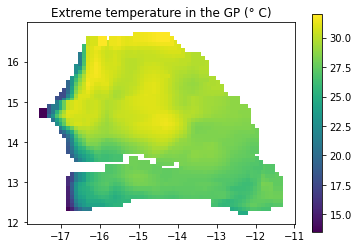

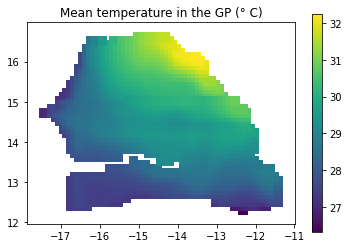

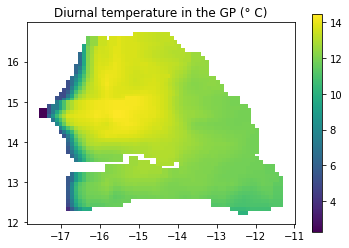

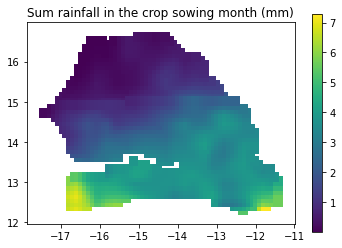

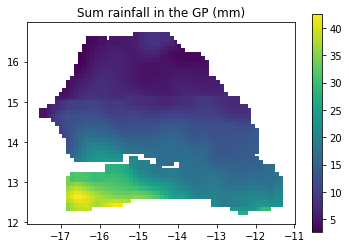

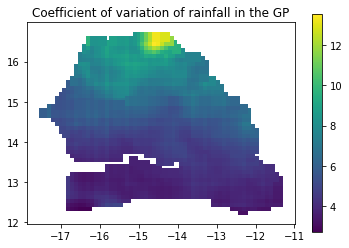

In [ ]:
fig, ax1 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='Extreme intra-period', ax=ax1, legend=True)
ax1.set_title('Extreme temperature in the GP (° C)')

fig, ax2 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='Mean temperature', ax=ax2, legend=True)
ax2.set_title('Mean temperature in the GP (° C)')

fig, ax3 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='Diurnal temperature', ax=ax3, legend=True)
ax3.set_title('Diurnal temperature in the GP (° C)')

fig, ax4 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='Sum rainfall in Jun(mm)', ax=ax4, legend=True)
ax4.set_title('Sum rainfall in the crop sowing month (mm)')

fig, ax5 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='Sum rainfall Jun_to_Nov_(mm)', ax=ax5, legend=True)
ax5.set_title('Sum rainfall in the GP (mm)')

fig, ax6 = plt.subplots(1, 1)
Clim_gpd_square.plot(column='rain_coef_of_var', ax=ax6, legend=True)
ax6.set_title('Coefficient of variation of rainfall in the GP')